In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Objective: To remove the missing values in the data and analysis the data on the basis of there numerical columns such as "Age","hours-per-week","capital-loss","educational-num","capital-gain","income".One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.

### Description: In the given adult dataset  the information related to employees are given.Where missing values are 13% . by analysing data i can say that capital gain is more as compared to capital-loss.the eductional numbers are average .thus, people are having good knowledge.
### Instances given in the data:
     -Age: age of the emloyee.
     -Workclass:the name of the sector they work in.
     -Fnlwgt: final-weight,number of units in the target population.
     -Education:hightest qualification of the employee.
     -Educational-num:repersents the number of years,how many years employee have studied.
     -Marital-status:Describe a significant relationship with other one.
     -Occupation: a job or profession.
     -Relationship:two people connect by blood or marriage.
     -Race:communities of people within the country.
     -Gender:shows the identity,male or female.
     -Capital-gain:A amount of profit(money).
     -Capital-loss:A amount of loss(money).
     -Hours-per-week:productive work done per week.
     -Native-country:the country in which the employee is born.
     -Income:A salary or wage.

In [48]:
missing_val=['n/a','-','?']
adt=pd.read_csv('C:\\Users\\s-gd\\OneDrive\\Desktop\\assign4/adult.csv',na_values=missing_val)

In [49]:
#details included in the dataset
print(adt.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [50]:
adt.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [51]:
#feature transfromation (categorial)
#converting string into interger,"<=50K" is 1 and ">50K" is 2.
income={"<=50K":1,">50K":2}
incomeadt=adt
incomeadt.income=[income[item]for item in adt.income]
incomeadt.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,2
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,1


In [52]:
#These are no. of rows and no. of columns respectively persent in the dataset.
adt.shape

(48842, 15)

In [53]:
#These are the main keypoints described here according to the given data. 
adt.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,1.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,2.000000


In [54]:
#In this i can observe that columns 'fnlwgt' is not useful. 
adt=adt.drop(columns='fnlwgt')

###### Removing the missing values.
#####  these missing values are hurdles in doing correct prediction of the given dataset.

In [55]:
adt.isnull()       #finding the missing value place.

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
adt.isnull().sum()      #taking the sum of all missing values.

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [57]:
#percentage of missing rows
((2809+2799+857)/48842)*100              #percentage of missing values

13.236558699479955

In [58]:
adt.dropna(axis=0,how='any',inplace=True)            # Removing all the rows,containing missing values.

# Univariate Analysis

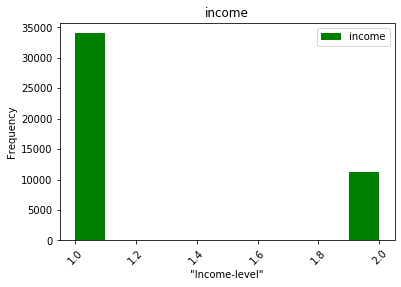

In [59]:
adt.plot.hist(y="income",facecolor="green")
plt.xticks(rotation=45)
plt.xlabel('"Income-level"')
plt.title("income")
plt.show()


### Observations:
The more number of people are getting salary below 50,000 as compared to people who are getting salary equal to or above 50,000.

### Outliers in each numerical column.

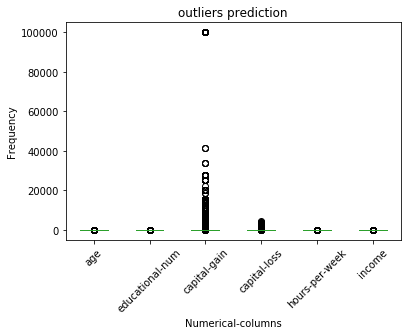

In [60]:
adt.plot.box()
plt.xticks(rotation=45)
plt.xlabel("Numerical-columns")
plt.ylabel("Frequency")
plt.title("outliers prediction")
plt.show()

## Observation:
    -"O" repersents outliers
    -green line repersents mean value of each numerical column.
    

# Bivariate Analysis

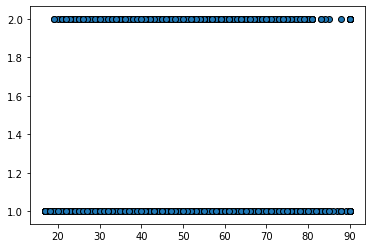

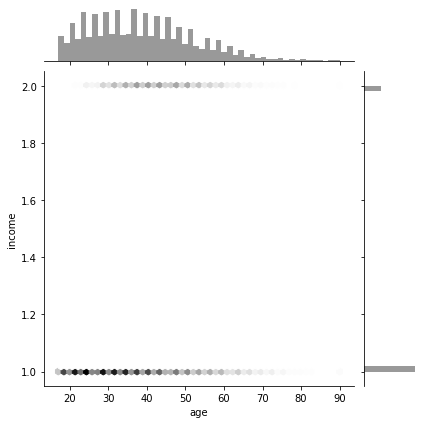

In [61]:
x=adt['age']
y=adt['income']
plt.scatter(x,y,edgecolor="black")
sns.jointplot(x=x,y=y,kind='hex',color='k')
plt.show()

## Observations:
    by observing the above graphs i can say that number of employees having salary <=50,000 are more between 20-40 years of age whereas employees who earn more than 50,000 are between age 35-45 years.  

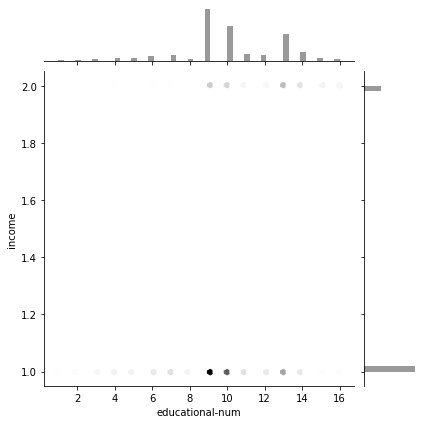

In [62]:
x=adt['educational-num']
y=adt['income']
sns.jointplot(x=x,y=y,kind='hex',color='k')
plt.show()

## Observation:
    -People who are earning <=50,000 having number of educational years between 9-10 whereas people who are earning >50,000 are 13-14 years.  

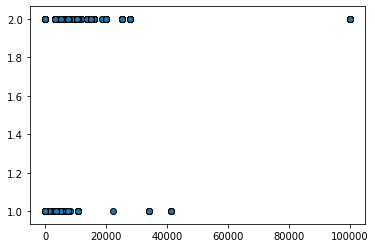

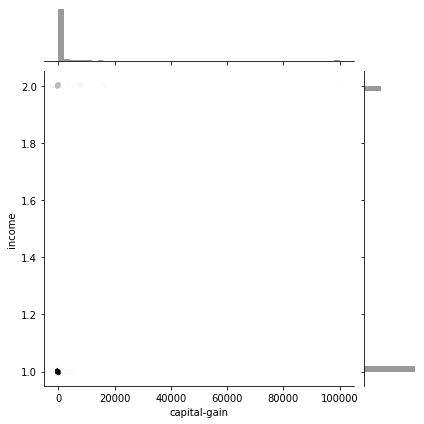

In [63]:
x=adt['capital-gain']
y=adt['income']
plt.scatter(x,y,edgecolor="black")
sns.jointplot(x=x,y=y,kind='hex',color='k')
plt.show()

## Observation :
   - As there is more profit in amount of capital employees are having good salary.

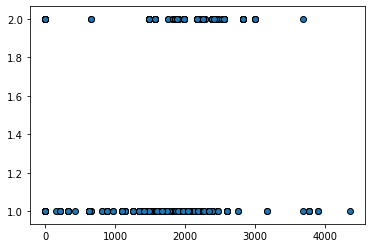

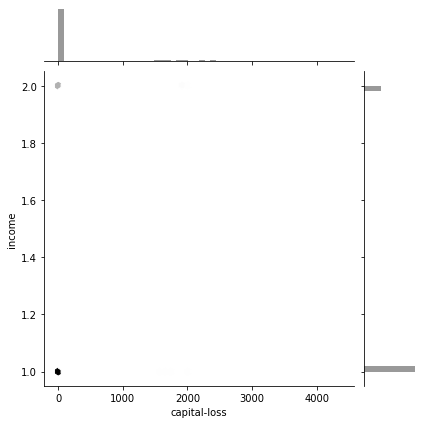

In [64]:
x=adt['capital-loss']
y=adt['income']
plt.scatter(x,y,edgecolor="black")
sns.jointplot(x=x,y=y,kind='hex',color='k')
plt.show()

## Observation:
    - On the basis of above graphs i can say that although there is a capital loss but in less amount as compared to capital gain.

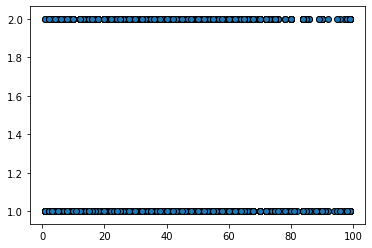

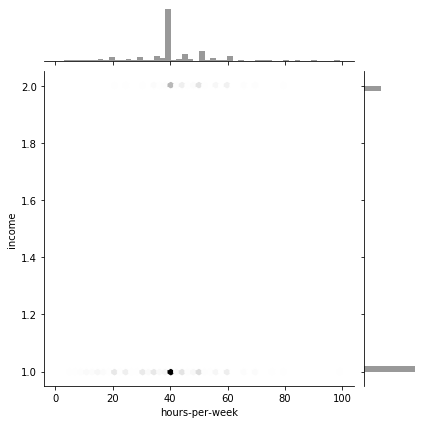

In [65]:
x=adt['hours-per-week']
y=adt['income']
plt.scatter(x,y,edgecolor="black")
sns.jointplot(x=x,y=y,kind='hex',color='k')
plt.show()

## Observation:
    -On the basis of above graphs i can conclude up that all the employees are working equally accordingly there occupations,which is 40 hours per week.

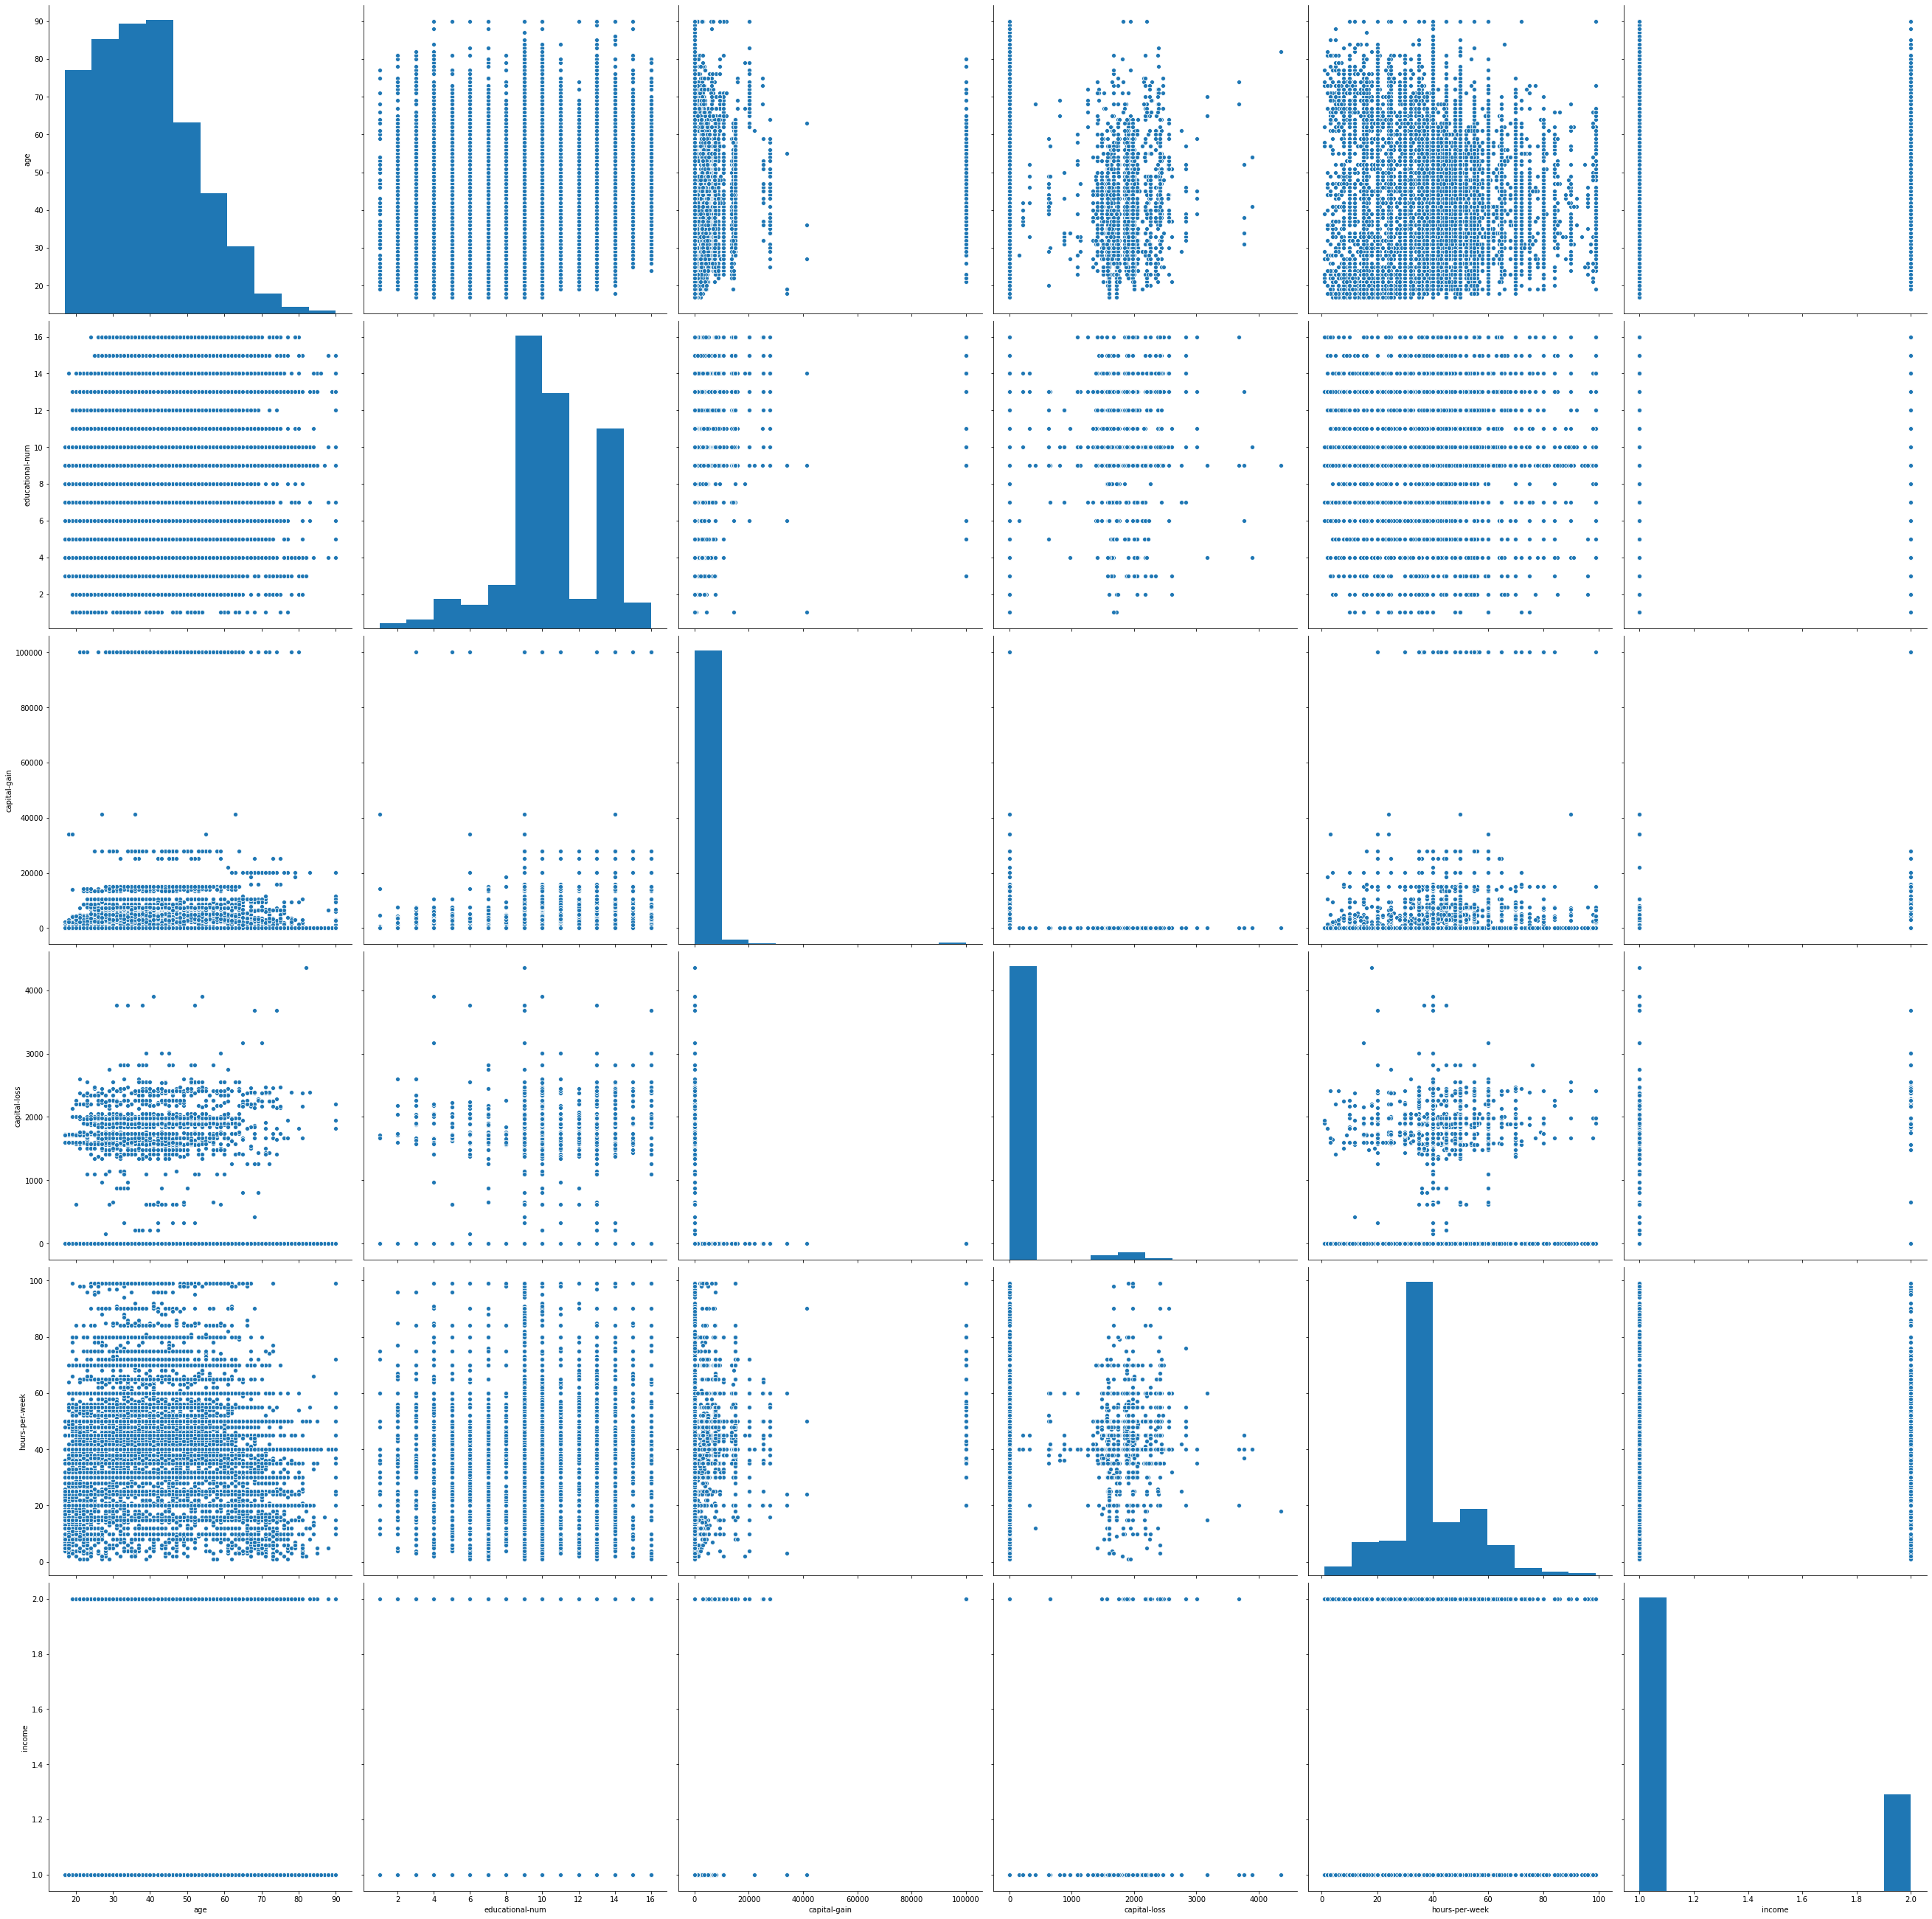

In [66]:
sns.pairplot(adt,palette="husl",height=6,vars=['age','educational-num','capital-gain','capital-loss','hours-per-week','income'])

# Normalisation 
using MinMaxscalar()

In [67]:
adt.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,2
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,2
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1


In [96]:
Age=[adt['age']]
print(MinMaxScaler().fit(Age))
print(MinMaxScaler().fit_transform(Age))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 0. 0. ... 0. 0. 0.]]


In [106]:
[adt['educational-num']]
print(MinMaxScaler().fit([adt['educational-num']]))
print(MinMaxScaler().fit_transform([adt['educational-num']]))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 0. 0. ... 0. 0. 0.]]


In [107]:
[adt['capital-gain']]
print(MinMaxScaler().fit([adt['capital-gain']]))
print(MinMaxScaler().fit_transform([adt['capital-gain']]))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 0. 0. ... 0. 0. 0.]]


In [108]:
[adt['capital-loss']]
print(MinMaxScaler().fit([adt['capital-loss']]))
print(MinMaxScaler().fit_transform([adt['capital-loss']]))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 0. 0. ... 0. 0. 0.]]


In [109]:
[adt['hours-per-week']]
print(MinMaxScaler().fit([adt['hours-per-week']]))
print(MinMaxScaler().fit_transform([adt['hours-per-week']]))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 0. 0. ... 0. 0. 0.]]


In [110]:
[adt['income']]
print(MinMaxScaler().fit([adt['income']]))
print(MinMaxScaler().fit_transform([adt['income']]))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 0. 0. ... 0. 0. 0.]]
